<!-- Add a markdown cell with a background image -->
<div style="background-image: url('mine.png'); background-size: cover; color: black; padding: 20px; text-align: center;">

# Final Project 

<h3>Laython Childers & Joel Miller</h3>

Today's Date: December 13, 2023

</div>


# Required Libraries

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import re

# Read the CSV file

In [229]:

df = pd.read_csv('labeled_comments.csv')

In [230]:

df['label'] = df['level_0'].astype(str) + df['level_1'].astype(str) + df['level_2'].astype(str) + df['level_3'].astype(str) + df['level_4'].astype(str)



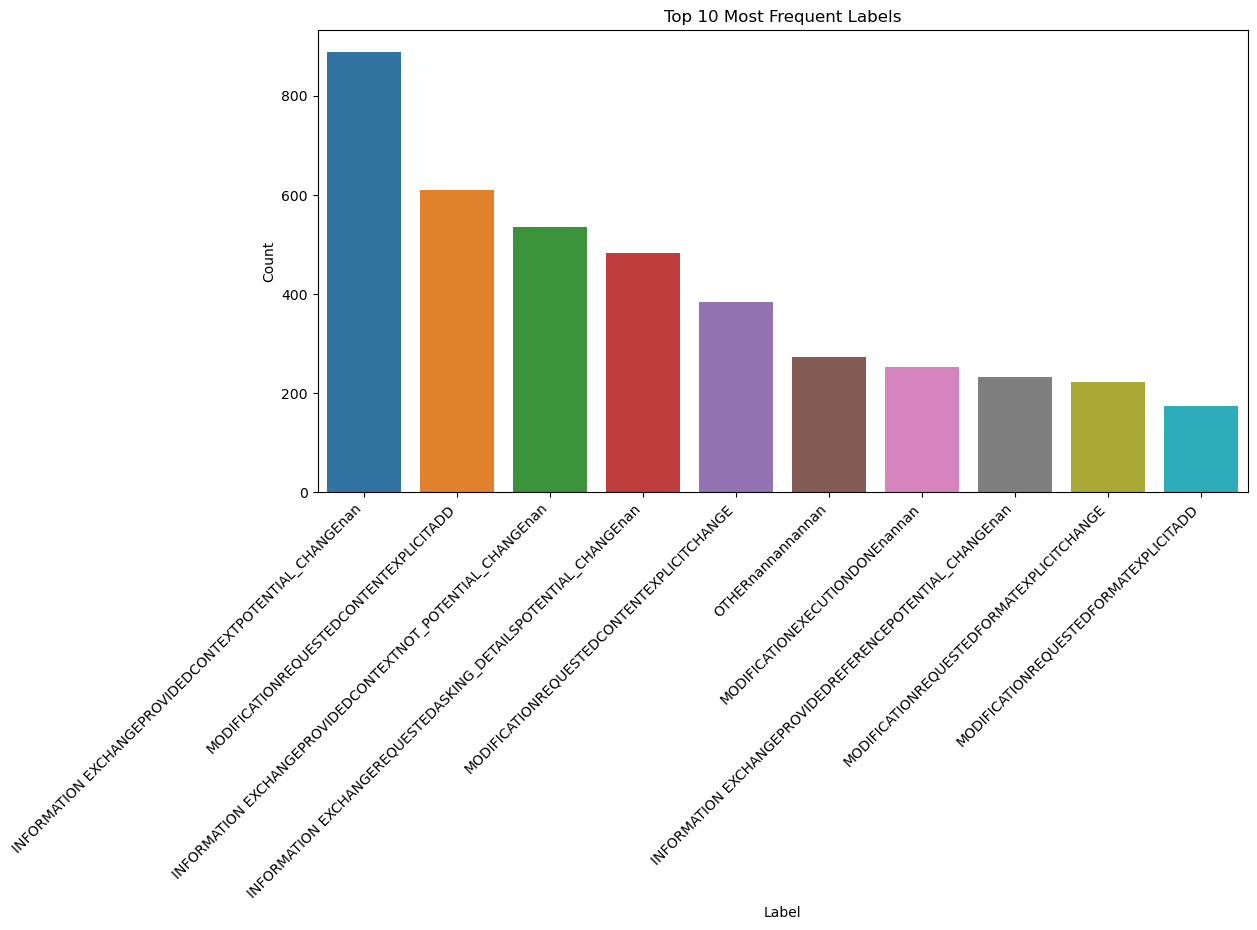

In [231]:
top_labels = df['label'].value_counts().nlargest(10) 

plt.figure(figsize=(12, 6))
sns.barplot(x=top_labels.index, y=top_labels.values)
plt.title('Top 10 Most Frequent Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Display basic information about the dataset


In [232]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5191 entries, 0 to 5190
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   file_id                      4991 non-null   object 
 1   comment_id                   5191 non-null   object 
 2   comment_date                 5191 non-null   object 
 3   anonymized_nickname          5176 non-null   object 
 4   document_paragraph_text      4700 non-null   object 
 5   document_selected_text       4181 non-null   object 
 6   document_selected_sentences  5165 non-null   float64
 7   comment_full_text            5191 non-null   object 
 8   comment_sentence_text        5191 non-null   object 
 9   is_sentence                  5191 non-null   int64  
 10  num_sentence                 5191 non-null   int64  
 11  total_sentences              5191 non-null   int64  
 12  grammar_checked              5191 non-null   int64  
 1

# Explore the distribution of labels


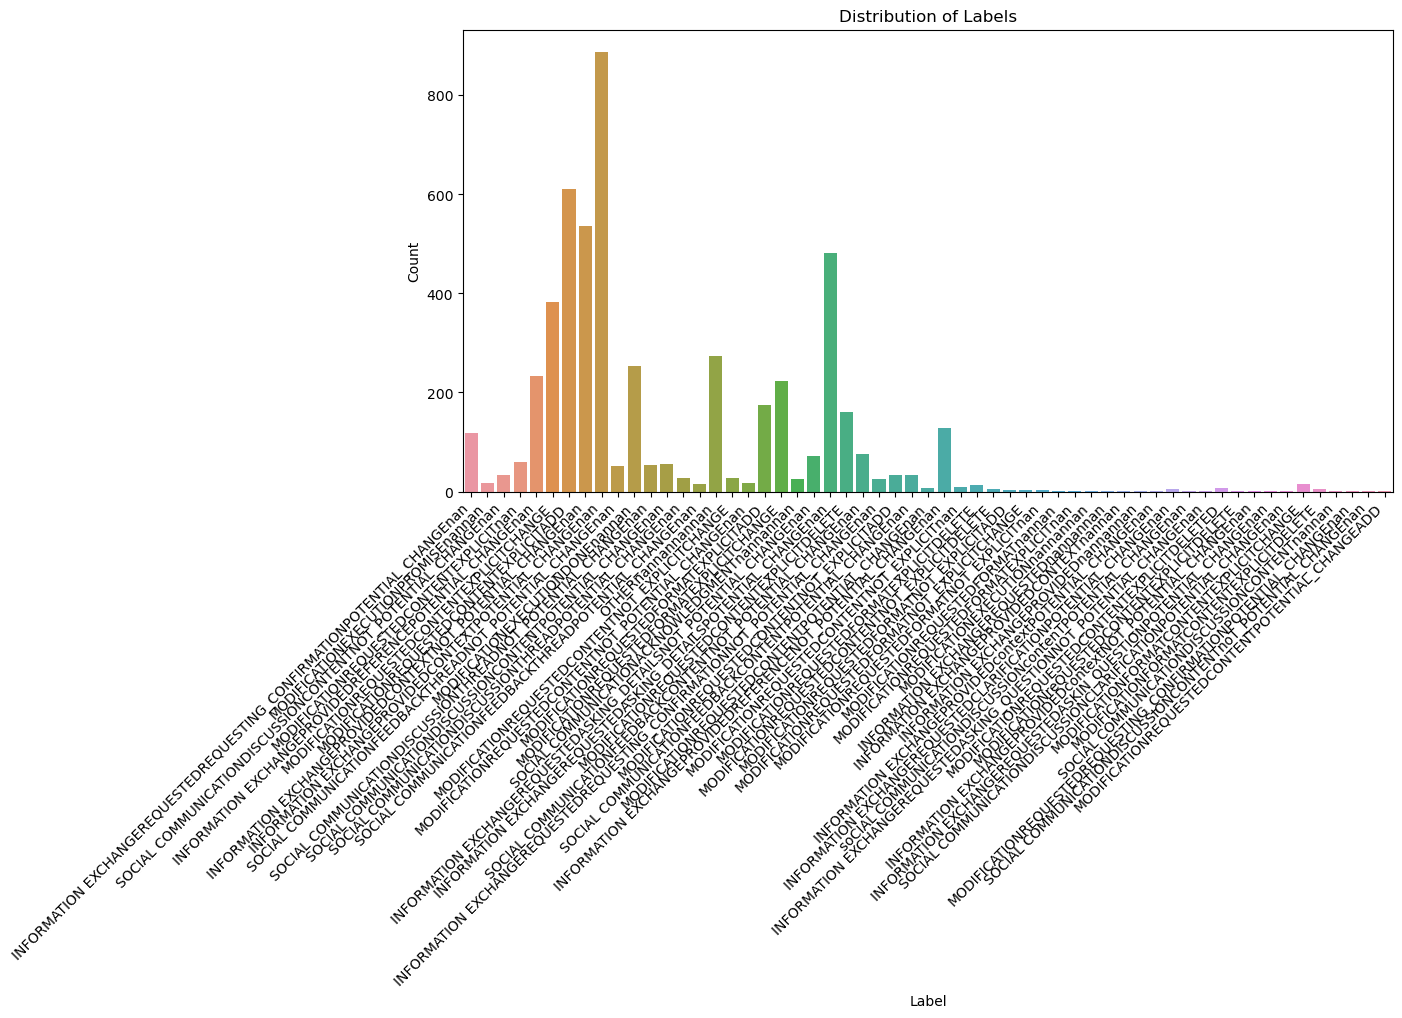

In [233]:
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Explore the distribution of comment lengths


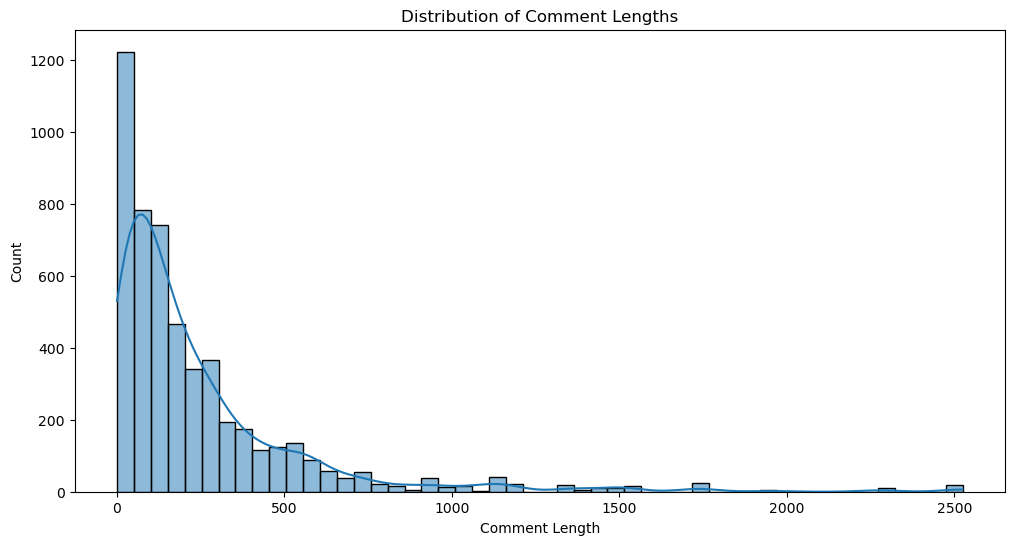

In [234]:
df['comment_length'] = df['comment_full_text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['comment_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Count')
plt.show()

# Clean text data

In [235]:


def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [236]:

df['comment_full_text'] = df['comment_full_text'].apply(clean_text)


# Label encoding for the target variable

In [237]:

df = df[['comment_full_text', 'label']]

In [238]:

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])




# Explore the distribution of labels after label encoding

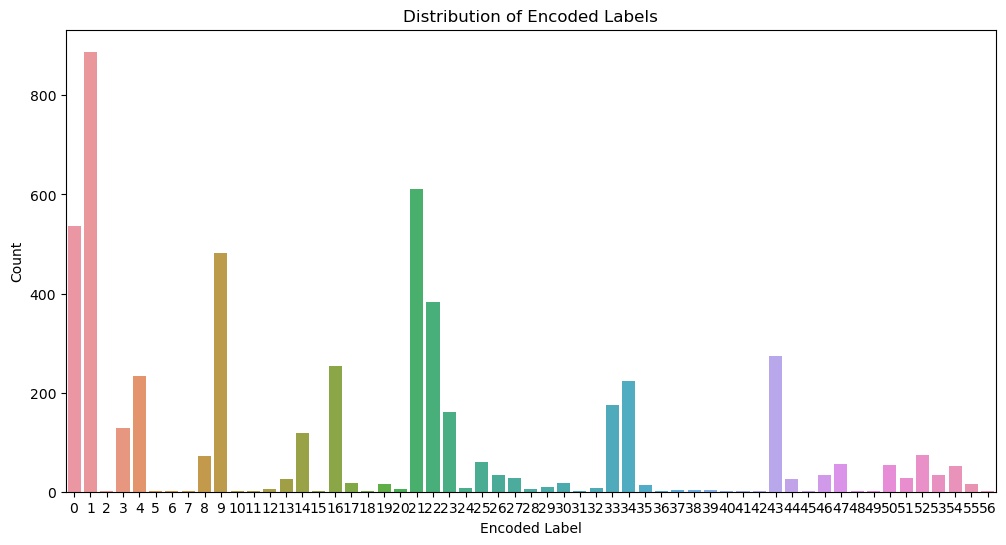

In [239]:


plt.figure(figsize=(12, 6))
sns.countplot(x='label_encoded', data=df)
plt.title('Distribution of Encoded Labels')
plt.xlabel('Encoded Label')
plt.ylabel('Count')
plt.show()


# Shuffle the DataFrame

In [240]:

df = shuffle(df, random_state=42).reset_index(drop=True)


# Select relevant columns for training

In [241]:

X = df['comment_full_text']

In [242]:
y = df['label_encoded']

# Split the dataset into training and testing sets (70% training, 30% testing)

In [243]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=23)

# Convert text data to numerical features using TF-IDF vectorization

In [244]:

vectorizer = TfidfVectorizer(max_features=None)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

# Make predictions on the test set

In [245]:

y_pred = model.predict(X_test_tfidf)

# Map encoded labels back to original levels
df_test = pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test),
                        'Predicted': label_encoder.inverse_transform(y_pred)})
df_test.reset_index(drop=True, inplace=True)
df_test['Correct'] = df_test['Actual'] == df_test['Predicted']

# Evaluate the model




# Display the first row for illustration

In [246]:

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)  # Set zero_division to 1


print("\nClassification Report:\n", classification_rep)
print("\nPredictions and Correctness:\n", df_test.head(1))  



Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.19      0.20       129
           1       0.33      0.64      0.44       222
           3       0.50      0.10      0.17        20
           4       0.54      0.23      0.32        62
           7       1.00      0.00      0.00         1
           8       1.00      0.00      0.00        19
           9       0.45      0.65      0.53       108
          12       1.00      0.00      0.00         1
          13       1.00      0.00      0.00        10
          14       0.25      0.10      0.14        21
          16       0.62      0.53      0.57        59
          17       0.75      0.60      0.67         5
          19       0.50      1.00      0.67         1
          20       1.00      0.00      0.00         3
          21       0.46      0.58      0.51       128
          22       0.45      0.25      0.32        89
          23       0.60      0.45      0.52        33
  

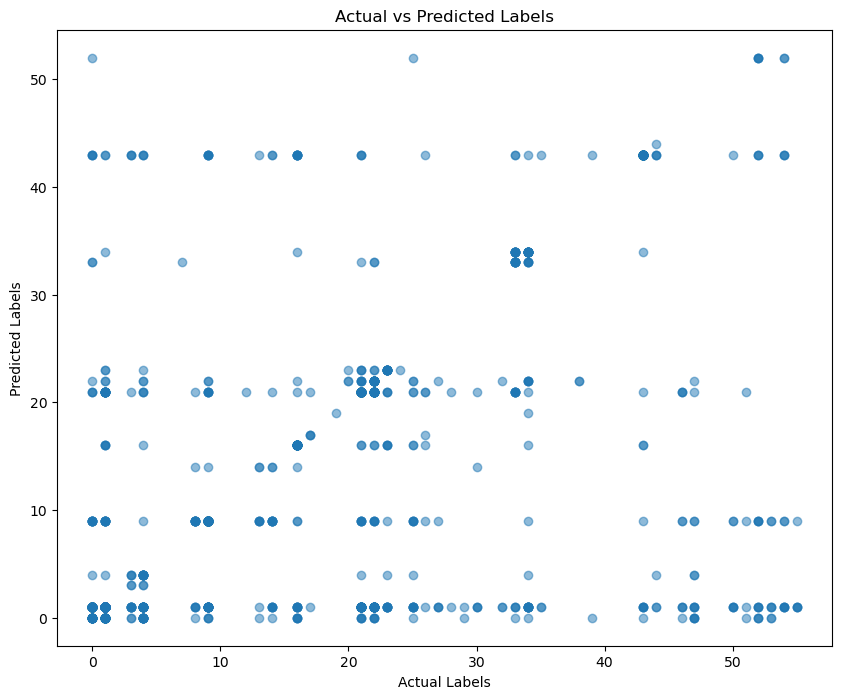

In [247]:
# Scatter plot for actual vs predicted labels
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Labels')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()


# Display accuracy

In [248]:

print(f"Accuracy: {accuracy}")


Accuracy: 0.40703517587939697


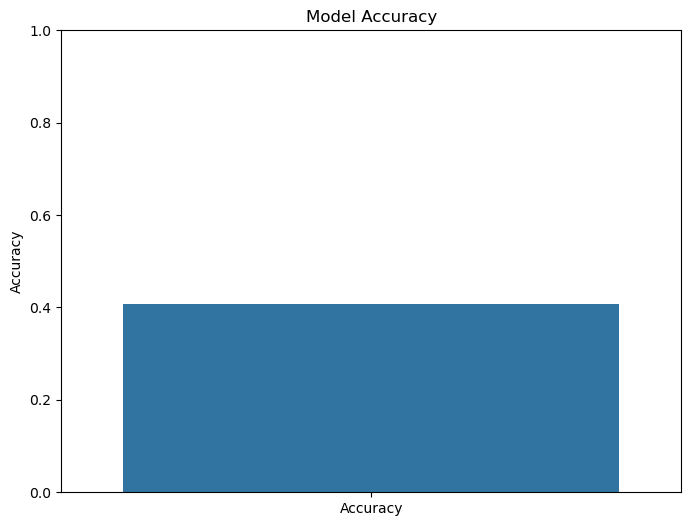

In [249]:
# Display accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis range to 0-1 for accuracy
plt.show()


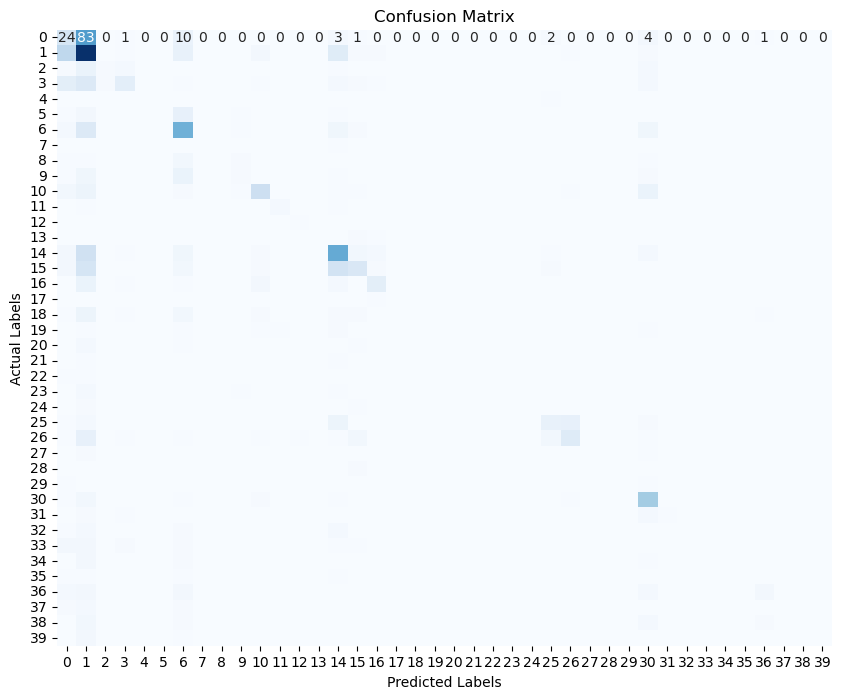

In [250]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


# List of new comments

In [259]:

new_comments = ["Moved"]

# List to store predicted labels
predicted_labels = []

 # Display the predicted results

In [260]:

# Loop through each new comment
for new_comment in new_comments:
    # Clean the new comment
    cleaned_new_comment = clean_text(new_comment)

    # Vectorize the new comment using the same TF-IDF vectorizer
    new_comment_tfidf = vectorizer.transform([cleaned_new_comment])

    # Make a prediction using the trained logistic regression model
    predicted_label_encoded = model.predict(new_comment_tfidf)[0]

    # Map the predicted label back to the original level
    predicted_label = label_encoder.inverse_transform([predicted_label_encoded])[0]

    # Clean the predicted label
    predicted_label_cleaned = predicted_label.replace('nannan', '')



   
    print(f"New Comment: {new_comment}")
    print(f"Predicted Label: {predicted_label}")
    print("")

    # Store the predicted label
    predicted_labels.append(predicted_label)

New Comment: Moved
Predicted Label: INFORMATION EXCHANGEPROVIDEDCONTEXTNOT_POTENTIAL_CHANGEnan

